# Neural Networks For Classification

In [1]:
# Source: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

In [2]:

# load the dataset
dataset = loadtxt('data/pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]


In [3]:

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [4]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)


Epoch 1/150
768/768 [==============================] - 0s 303us/step - loss: 3.3317 - accuracy: 0.4401
Epoch 2/150
768/768 [==============================] - 0s 119us/step - loss: 1.9365 - accuracy: 0.4466
Epoch 3/150
768/768 [==============================] - 0s 109us/step - loss: 1.3919 - accuracy: 0.4427
Epoch 4/150
768/768 [==============================] - 0s 111us/step - loss: 1.0653 - accuracy: 0.4961
Epoch 5/150
768/768 [==============================] - 0s 120us/step - loss: 0.8967 - accuracy: 0.5612
Epoch 6/150
768/768 [==============================] - 0s 115us/step - loss: 0.7783 - accuracy: 0.6237
Epoch 7/150
768/768 [==============================] - 0s 109us/step - loss: 0.7398 - accuracy: 0.6211
Epoch 8/150
768/768 [==============================] - 0s 111us/step - loss: 0.7189 - accuracy: 0.6263
Epoch 9/150
768/768 [==============================] - 0s 145us/step - loss: 0.7229 - accuracy: 0.6406
Epoch 10/150
768/768 [==============================] - 0s 160us/step - 

768/768 [==============================] - 0s 105us/step - loss: 0.5233 - accuracy: 0.7435
Epoch 78/150
768/768 [==============================] - 0s 95us/step - loss: 0.5002 - accuracy: 0.7630
Epoch 79/150
768/768 [==============================] - 0s 93us/step - loss: 0.5204 - accuracy: 0.7461
Epoch 80/150
768/768 [==============================] - 0s 98us/step - loss: 0.5245 - accuracy: 0.7500
Epoch 81/150
768/768 [==============================] - 0s 133us/step - loss: 0.5014 - accuracy: 0.7695
Epoch 82/150
768/768 [==============================] - 0s 141us/step - loss: 0.5005 - accuracy: 0.7552
Epoch 83/150
768/768 [==============================] - 0s 124us/step - loss: 0.5049 - accuracy: 0.7552
Epoch 84/150
768/768 [==============================] - 0s 113us/step - loss: 0.5034 - accuracy: 0.7487
Epoch 85/150
768/768 [==============================] - 0s 103us/step - loss: 0.5042 - accuracy: 0.7591
Epoch 86/150
768/768 [==============================] - 0s 112us/step - loss: 0.

In [6]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

768/768 [==============================] - 0s 48us/step
Accuracy: 77.60


In [7]:
# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]

In [8]:
...
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)

In [9]:
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


# Neural Network for Regression

In [10]:
#Source: https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/
import pandas as pd
import numpy as np
 
# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)
 
CarPricesDataNumeric=pd.read_pickle('data/CarPricesData.pkl')
CarPricesDataNumeric.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


In [11]:
TargetVariable=['Price']
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']
 
X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 7)
(1004, 1)
(431, 7)
(431, 1)


In [12]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
1004/1004 [==============================] - 0s 167us/step - loss: 0.9806
Epoch 2/50
1004/1004 [==============================] - 0s 66us/step - loss: 0.9178
Epoch 3/50
1004/1004 [==============================] - 0s 63us/step - loss: 0.6953
Epoch 4/50
1004/1004 [==============================] - 0s 61us/step - loss: 0.4179
Epoch 5/50
1004/1004 [==============================] - 0s 52us/step - loss: 0.2857
Epoch 6/50
1004/1004 [==============================] - 0s 47us/step - loss: 0.2367
Epoch 7/50
1004/1004 [==============================] - 0s 76us/step - loss: 0.2132
Epoch 8/50
1004/1004 [==============================] - 0s 50us/step - loss: 0.1965
Epoch 9/50
1004/1004 [==============================] - 0s 81us/step - loss: 0.1838
Epoch 10/50
1004/1004 [==============================] - 0s 72us/step - loss: 0.1739
Epoch 11/50
1004/1004 [==============================] - 0s 59us/step - loss: 0.1659
Epoch 12/50
1004/1004 [==============================] - 0s 60us/step - l

In [13]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 59.23567022624519
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 60.25463543069853
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 63.75456954975169
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 66.27254583961071
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 31.805245245624747
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 34.46431307403358
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 65.10603887441866
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 65.02198352730974
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 40.59795403475882
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 59.23986599301808
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 62.984485416546754
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 66.44066720467855
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 36.421635397998614
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 33.94764105792342
15 Parameters: ba

<AxesSubplot:xlabel='Parameters'>

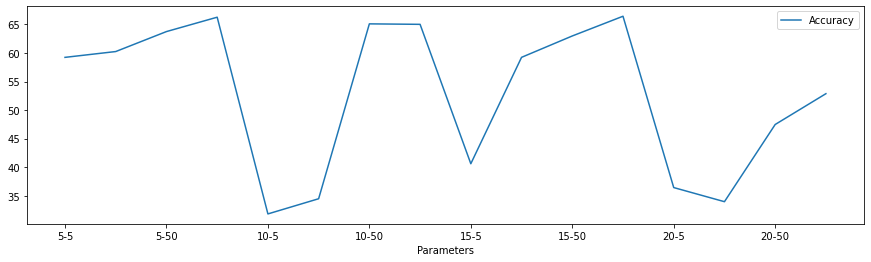

In [14]:

%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [15]:

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9731.089844
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,10122.725586
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,8460.382812
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9229.216797
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8952.433594


In [16]:
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 91.06058996645626


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice,APE
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9731.089844,2.200102
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,10122.725586,26.613203
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,8460.382812,12.805104
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9229.216797,7.244052
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8952.433594,0.027191


In [17]:
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model
 
###########################################
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
 
# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }
 
# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)
 
###########################################
from sklearn.metrics import make_scorer
 
# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
 
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
 
#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, 
                         param_grid=Parameter_Trials, 
                         scoring=custom_Scoring, 
                         cv=5)
 
#########################################
# Measuring how much time it took to find the best params
import time
StartTime=time.time()
 
# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)
 
EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')
 
print('### Printing Best parameters ###')
grid_search.best_params_

Epoch 1/10
1148/1148 [==============================] - 1s 481us/step - loss: 0.3410
Epoch 2/10
1148/1148 [==============================] - 0s 142us/step - loss: 0.1901
Epoch 3/10
1148/1148 [==============================] - 0s 148us/step - loss: 0.1367
Epoch 4/10
1148/1148 [==============================] - 0s 159us/step - loss: 0.1205
Epoch 5/10
1148/1148 [==============================] - 0s 146us/step - loss: 0.1112
Epoch 6/10
1148/1148 [==============================] - 0s 152us/step - loss: 0.1061
Epoch 7/10
1148/1148 [==============================] - 0s 166us/step - loss: 0.1023
Epoch 8/10
1148/1148 [==============================] - 0s 157us/step - loss: 0.0998
Epoch 9/10
1148/1148 [==============================] - 0s 145us/step - loss: 0.0978
Epoch 10/10
1148/1148 [==============================] - 0s 149us/step - loss: 0.0956
###################################################################### Accuracy: 20.555801521486487
Epoch 1/10
1148/1148 [===========================

1148/1148 [==============================] - 0s 127us/step - loss: 0.1071
Epoch 20/20
1148/1148 [==============================] - 0s 119us/step - loss: 0.1057
###################################################################### Accuracy: -196.01616618377483
Epoch 1/20
1148/1148 [==============================] - 1s 532us/step - loss: 1.1637
Epoch 2/20
1148/1148 [==============================] - 0s 127us/step - loss: 0.9012
Epoch 3/20
1148/1148 [==============================] - 0s 122us/step - loss: 0.4322
Epoch 4/20
1148/1148 [==============================] - 0s 123us/step - loss: 0.1736
Epoch 5/20
1148/1148 [==============================] - 0s 127us/step - loss: 0.1395
Epoch 6/20
1148/1148 [==============================] - 0s 117us/step - loss: 0.1363
Epoch 7/20
1148/1148 [==============================] - 0s 131us/step - loss: 0.1334
Epoch 8/20
1148/1148 [==============================] - 0s 123us/step - loss: 0.1316
Epoch 9/20
1148/1148 [==============================] - 0s 

Epoch 8/10
1148/1148 [==============================] - 0s 80us/step - loss: 0.7147
Epoch 9/10
1148/1148 [==============================] - 0s 70us/step - loss: 0.6837
Epoch 10/10
1148/1148 [==============================] - 0s 71us/step - loss: 0.6549
###################################################################### Accuracy: 114.51142864677644
Epoch 1/10
1148/1148 [==============================] - 1s 537us/step - loss: 1.1265
Epoch 2/10
1148/1148 [==============================] - 0s 68us/step - loss: 1.0585
Epoch 3/10
1148/1148 [==============================] - 0s 66us/step - loss: 0.8571
Epoch 4/10
1148/1148 [==============================] - 0s 64us/step - loss: 0.5735
Epoch 5/10
1148/1148 [==============================] - 0s 63us/step - loss: 0.3561
Epoch 6/10
1148/1148 [==============================] - 0s 68us/step - loss: 0.2325
Epoch 7/10
1148/1148 [==============================] - 0s 65us/step - loss: 0.1728
Epoch 8/10
1148/1148 [==============================] - 0s

1148/1148 [==============================] - 0s 87us/step - loss: 0.1950
Epoch 8/20
1148/1148 [==============================] - 0s 81us/step - loss: 0.1600
Epoch 9/20
1148/1148 [==============================] - 0s 85us/step - loss: 0.1420
Epoch 10/20
1148/1148 [==============================] - 0s 74us/step - loss: 0.1322
Epoch 11/20
1148/1148 [==============================] - 0s 79us/step - loss: 0.1287
Epoch 12/20
1148/1148 [==============================] - 0s 103us/step - loss: 0.1259
Epoch 13/20
1148/1148 [==============================] - 0s 131us/step - loss: 0.1247
Epoch 14/20
1148/1148 [==============================] - 0s 123us/step - loss: 0.1235
Epoch 15/20
1148/1148 [==============================] - 0s 207us/step - loss: 0.1222
Epoch 16/20
1148/1148 [==============================] - 0s 184us/step - loss: 0.1212
Epoch 17/20
1148/1148 [==============================] - 0s 181us/step - loss: 0.1214
Epoch 18/20
1148/1148 [==============================] - 0s 162us/step - 

1148/1148 [==============================] - 0s 51us/step - loss: 0.1238
Epoch 6/20
1148/1148 [==============================] - 0s 52us/step - loss: 0.1080
Epoch 7/20
1148/1148 [==============================] - 0s 70us/step - loss: 0.0983
Epoch 8/20
1148/1148 [==============================] - 0s 57us/step - loss: 0.0920
Epoch 9/20
1148/1148 [==============================] - 0s 52us/step - loss: 0.0876
Epoch 10/20
1148/1148 [==============================] - 0s 53us/step - loss: 0.0854
Epoch 11/20
1148/1148 [==============================] - 0s 52us/step - loss: 0.0836
Epoch 12/20
1148/1148 [==============================] - 0s 52us/step - loss: 0.0821
Epoch 13/20
1148/1148 [==============================] - 0s 49us/step - loss: 0.0813
Epoch 14/20
1148/1148 [==============================] - 0s 59us/step - loss: 0.0806
Epoch 15/20
1148/1148 [==============================] - 0s 54us/step - loss: 0.0803
Epoch 16/20
1148/1148 [==============================] - 0s 52us/step - loss: 0.0

1148/1148 [==============================] - 0s 65us/step - loss: 0.1763
Epoch 17/20
1148/1148 [==============================] - 0s 69us/step - loss: 0.1732
Epoch 18/20
1148/1148 [==============================] - 0s 68us/step - loss: 0.1682
Epoch 19/20
1148/1148 [==============================] - 0s 61us/step - loss: 0.1648
Epoch 20/20
1148/1148 [==============================] - 0s 60us/step - loss: 0.1617
###################################################################### Accuracy: 142.9006714814597
Epoch 1/10
1148/1148 [==============================] - 1s 1ms/step - loss: 0.3105
Epoch 2/10
1148/1148 [==============================] - 0s 188us/step - loss: 0.1819
Epoch 3/10
1148/1148 [==============================] - 0s 158us/step - loss: 0.1320
Epoch 4/10
1148/1148 [==============================] - 0s 164us/step - loss: 0.1105
Epoch 5/10
1148/1148 [==============================] - 0s 249us/step - loss: 0.0994
Epoch 6/10
1148/1148 [==============================] - 0s 247us/

1148/1148 [==============================] - 0s 157us/step - loss: 0.1155 0s - loss: 0.118
Epoch 14/20
1148/1148 [==============================] - 0s 181us/step - loss: 0.1139
Epoch 15/20
1148/1148 [==============================] - 0s 198us/step - loss: 0.1135
Epoch 16/20
1148/1148 [==============================] - 0s 208us/step - loss: 0.1122
Epoch 17/20
1148/1148 [==============================] - 0s 200us/step - loss: 0.1112
Epoch 18/20
1148/1148 [==============================] - 0s 191us/step - loss: 0.1101
Epoch 19/20
1148/1148 [==============================] - 0s 166us/step - loss: 0.1096
Epoch 20/20
1148/1148 [==============================] - 0s 165us/step - loss: 0.1084
###################################################################### Accuracy: -176.96504764152024
Epoch 1/20
1148/1148 [==============================] - 1s 1ms/step - loss: 1.1175
Epoch 2/20
1148/1148 [==============================] - 0s 159us/step - loss: 0.7906
Epoch 3/20
1148/1148 [================

1148/1148 [==============================] - 1s 895us/step - loss: 1.1681
Epoch 2/10
1148/1148 [==============================] - 0s 97us/step - loss: 1.0963
Epoch 3/10
1148/1148 [==============================] - 0s 90us/step - loss: 0.9510
Epoch 4/10
1148/1148 [==============================] - 0s 90us/step - loss: 0.7357
Epoch 5/10
1148/1148 [==============================] - 0s 96us/step - loss: 0.4891
Epoch 6/10
1148/1148 [==============================] - 0s 99us/step - loss: 0.2875
Epoch 7/10
1148/1148 [==============================] - 0s 91us/step - loss: 0.1957
Epoch 8/10
1148/1148 [==============================] - 0s 90us/step - loss: 0.1619
Epoch 9/10
1148/1148 [==============================] - 0s 82us/step - loss: 0.1494
Epoch 10/10
1148/1148 [==============================] - 0s 82us/step - loss: 0.1414
###################################################################### Accuracy: 116.6090445586079
Epoch 1/10
1148/1148 [==============================] - 1s 1ms/step - 

Epoch 1/20
1148/1148 [==============================] - 1s 912us/step - loss: 1.1291
Epoch 2/20
1148/1148 [==============================] - 0s 91us/step - loss: 1.0807
Epoch 3/20
1148/1148 [==============================] - 0s 91us/step - loss: 0.9731
Epoch 4/20
1148/1148 [==============================] - 0s 90us/step - loss: 0.8325
Epoch 5/20
1148/1148 [==============================] - 0s 95us/step - loss: 0.7085
Epoch 6/20
1148/1148 [==============================] - 0s 83us/step - loss: 0.6013
Epoch 7/20
1148/1148 [==============================] - 0s 82us/step - loss: 0.4995
Epoch 8/20
1148/1148 [==============================] - 0s 83us/step - loss: 0.4052
Epoch 9/20
1148/1148 [==============================] - 0s 87us/step - loss: 0.3259
Epoch 10/20
1148/1148 [==============================] - 0s 89us/step - loss: 0.2637
Epoch 11/20
1148/1148 [==============================] - 0s 100us/step - loss: 0.2151
Epoch 12/20
1148/1148 [==============================] - 0s 96us/step - 

1148/1148 [==============================] - 0s 78us/step - loss: 0.2986
###################################################################### Accuracy: 181.83158106824592
Epoch 1/20
1148/1148 [==============================] - 1s 1ms/step - loss: 0.3628
Epoch 2/20
1148/1148 [==============================] - 0s 72us/step - loss: 0.3179
Epoch 3/20
1148/1148 [==============================] - 0s 73us/step - loss: 0.2654
Epoch 4/20
1148/1148 [==============================] - 0s 85us/step - loss: 0.2150
Epoch 5/20
1148/1148 [==============================] - 0s 73us/step - loss: 0.1731
Epoch 6/20
1148/1148 [==============================] - 0s 71us/step - loss: 0.1450
Epoch 7/20
1148/1148 [==============================] - 0s 65us/step - loss: 0.1261
Epoch 8/20
1148/1148 [==============================] - 0s 90us/step - loss: 0.1137
Epoch 9/20
1148/1148 [==============================] - 0s 74us/step - loss: 0.1048
Epoch 10/20
1148/1148 [==============================] - 0s 72us/step - 

1148/1148 [==============================] - 0s 92us/step - loss: 0.5001
Epoch 12/20
1148/1148 [==============================] - 0s 71us/step - loss: 0.4153
Epoch 13/20
1148/1148 [==============================] - 0s 75us/step - loss: 0.3462: 0s - loss: 0.363
Epoch 14/20
1148/1148 [==============================] - 0s 66us/step - loss: 0.2934
Epoch 15/20
1148/1148 [==============================] - 0s 64us/step - loss: 0.2548
Epoch 16/20
1148/1148 [==============================] - 0s 62us/step - loss: 0.2300
Epoch 17/20
1148/1148 [==============================] - 0s 61us/step - loss: 0.2125
Epoch 18/20
1148/1148 [==============================] - 0s 66us/step - loss: 0.2000
Epoch 19/20
1148/1148 [==============================] - 0s 65us/step - loss: 0.1912
Epoch 20/20
1148/1148 [==============================] - 0s 60us/step - loss: 0.1838
###################################################################### Accuracy: 153.27461331432352
Epoch 1/20
1435/1435 [======================

{'Optimizer_trial': 'adam', 'batch_size': 20, 'epochs': 20}